In [1]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model as lm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bodyfat = fetch_openml(name='bodyfat', version=1)
df = pd.DataFrame(data= np.c_[bodyfat['data'], bodyfat['target']],
                     columns= bodyfat['feature_names'] + ['target'])
y = df['target']
X = df.loc[:, df.columns != 'target']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

/home/moisestellezfrancisco/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


   Density   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708  23.0  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853  22.0  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414  22.0  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751  26.0  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340  24.0  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  
(252, 14)
0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: target, dtype: float64
(252,)


# Regresión lineal

In [2]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X)
print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  1.5272035183907957
Mean absolute error:  0.4801966008373651
R2 score:  0.9781070874885561


## Ejercicio

Selecciona un par de variables interesantes para poder dibujar el gráfico de la regresión lineal y observa el ajuste gráfico frente a las medidas de rendimiento obtenidas

Para dibujar un gráfico de ajuste con scatter plot puedes usar este código básico:
```python
plt.scatter(X, y,color='g') 
plt.plot(X, y_pred, color='k') 
plt.show()
```

In [8]:
df['Density']

0      1.0708
1      1.0853
2      1.0414
3      1.0751
4      1.0340
        ...  
247    1.0736
248    1.0236
249    1.0328
250    1.0399
251    1.0271
Name: Density, Length: 252, dtype: float64

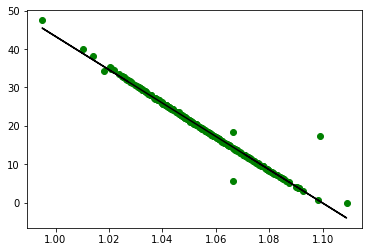

In [14]:
y = df['target']
X = np.array(df['Density']).reshape(-1,1)

reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X)
plt.scatter(X, y,color='g') 
plt.plot(X, y_pred, color='k') 
plt.show()

# Regresión polinomial

En Scikit Learn, la regresión polinomial se crea aplicando una transformación a los atributos, generando los nuevos atributos con los coeficientes del polinomio. A continuación, se realiza un ajuste de una regresión lineal.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Por defecto, PolynomialFeatures incluye el término independiente Bias a true
poly_reg = PolynomialFeatures(degree=3) #cuidado con el grado: el número de coeficientes crece exponencialmente con su valor de acuerdo a la matriz de Vandermonde

X_poly = poly_reg.fit_transform(X)

# Ya tenemos las características transformadas, ahora entrenamos el modelo
reg2 = LinearRegression()
reg2.fit(X_poly,y) # Aquí es donde ajustamos los coefientes del modelo y reg2 se actualiza en consecuencia

y_pred = reg2.predict(X_poly)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  1.3409751178113556
Mean absolute error:  0.3451359839261892
R2 score:  0.9807767264934006


Es posible crear un flujo completo de trabajo utilizando la función make_pipeline().

Esta función genera la transformación y la aplica al regresor (lineal en nuestro caso) en una única línea.

In [24]:
from sklearn.pipeline import make_pipeline

reg3 = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
reg3.fit(X,y) 

y_pred = reg3.predict(X) # Fíjate que utilizamos los datos sin transformar para realizar la predicción. El pipeline se encarga de realizar la transformación

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  1.2821633691193657
Mean absolute error:  0.28647076705810687
R2 score:  0.9816198102430475


## Ejercicio
¿Por qué los valores de rendimiento mejoran cuando aumentamos el grado del ajuste polinomial? Pruebe a realizar una validación de training y test (mínimo un Hold-out) y observe de nuevo el efecto de aumentar el grado del polinomio.

**Nota**: Si utiliza particiones de entrenamiento y test, tendrá que aplicar el método fit_transform a los valores X tanto del conjunto de entrenamiento como del conjunto de test.

# Regresión con Splines

En la regresión con splines se aplica la regresión polinómica "a trozos": entre ciertos valores de los atributos de entrada (los nodos o "knots") se genera el ajuste de un regresor polinómico.
Esto supone crear una transformación como la que hemos visto para la regresión polinómica, pero la matriz de transformación es diferente ahora.

Además, hemos de elegir qué estimador polinómico queremos ajustar entre los nodos.

Para condensar el ejemplo, utilizaremos la función make_pipeline() de nuevo.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

spline = make_pipeline(SplineTransformer(n_knots=8, degree=6), LinearRegression()) #n_knots es el número de puntos de control y degree el grado del polinomio
spline.fit(X, y)

y_pred = spline.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  0.19489839254863678
Mean absolute error:  0.23933105468749996
R2 score:  0.9972060741051826


## Ejercicio

1. Observa el efecto del número de nodos o puntos de control y del grado en el rendimiento del algoritmo.
2. Experimenta con una validación adecuada (Hold-out o validación cruzada) y el uso del pipeline para realizar la validación.
3. Prueba a elegir un atributo de entrada para poder pintar con un plot el resultado del ajuste spline frente a la salida.


# Regresión lineal a trozos (LOESS)

Actualmente, sklearn no incluye este modelo de regresión, aunque el paquete statmodels sí incluye una versión unidimensional.

La incluimos a continuación y mostramos un ejemplo de su utilización en nuestro conjunto para una de las características.

Mean squared error:  21.279077149942545
Mean absolute error:  3.716767301273681
R2 score:  0.694958157994011


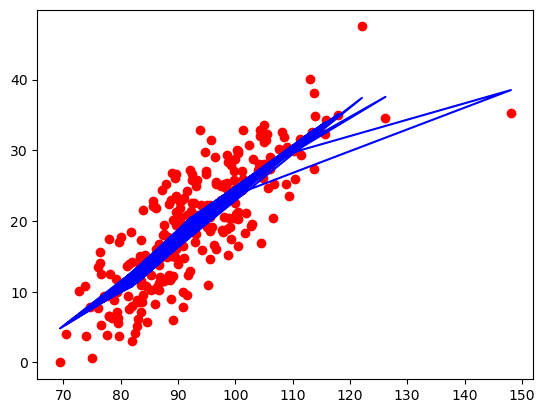

In [8]:
from statsmodels.api import nonparametric

X_mono = X['Abdomen'] # La regresión linea a trozos sólo admite una variable independiente en statsmodels


lowess_sm = nonparametric.lowess

y_pred = lowess_sm(y,X_mono.to_numpy(),frac=1./3.,it=3, return_sorted = False)
print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

plt.scatter(X['Abdomen'], y, color = 'red')
plt.plot(X['Abdomen'], y_pred, color = 'blue')
plt.show()

## Ejercicio

Se aprecia como la regresión "va y vuelve". Intente solucionarlo ordenando los datos de entrada (X_mono).

# Generalized Additive Models

De nuevo, sklearn no tiene una implementación nativa de GAMs. Es posible encontrar una buena biblioteca en https://pygam.readthedocs.io/en/latest/

La información para su instalación está en https://pygam.readthedocs.io/en/latest/notebooks/quick_start.html#Install-pyGAM

Recordemos que las GAMs permiten establecer linealidades o no linealidades en diferentes atributos a nuestra elección. PyGAM especifica esto en la creación del modelo.

In [9]:
from pygam import LinearGAM, s, f, l

# Definimos el modelo utilizando las siguientes funciones:
# 1. la función s para indicar que se ajustara una función spline a la variable independiente con el correspondiente índice
# 2. En el caso de usar f, se aplicará un factor de ajuste a la variable independiente con el correspondiente índice
# 3. En el caso de usar l, se aplicará un término lineal a la variable independiente con el correspondiente índice

# Tenemos 14 atributos de entrada en nuestro conjunto, vamos a realizar un ajuste por cada uno de ellos de forma arbitraria
gam = LinearGAM(s(0) + s(1) + f(2) + l(3) + l(4) + l(5) + l(6) + l(7) + l(8) + l(9) + l(10) + l(11) + l(12) + l(13))

gam.fit(X, y)

#Vamos a visualizar el modelo
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     92.6098
Link Function:                     IdentityLink Log Likelihood:                                  -334.9558
Number of Samples:                          252 AIC:                                              857.1311
                                                AICc:                                             969.6719
                                                GCV:                                                3.0667
                                                Scale:                                              1.1429
                                                Pseudo R-Squared:                                   0.9896
Feature Function                  Lam

C:\Users\julian\AppData\Local\Temp\ipykernel_37504\3414484672.py:14: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [10]:
y_pred = gam.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  0.7228584994869833
Mean absolute error:  0.38610795714579593
R2 score:  0.9896376103794619


## Ejercicios

1. Observe los p-values devueltos por el summary() de nuestra GAM. Aquellos valores más bajos dan pistas de los atributos más importantes. Prueve a variar el ajuste utilizado para esos atributos.
2. Pruebe a ajustar los parámetros de regularización con el método gridsearch() (más info en https://pygam.readthedocs.io/en/latest/notebooks/quick_start.html#Automatically-tune-the-model)

# Gradiente descendente estocástico

In [11]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.1, eta0=0.01, learning_rate='constant', loss='squared_error', random_state=100)
sgd.fit(X, y)

y_pred = sgd.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))


Mean squared error:  4.980196662455605e+28
Mean absolute error:  221866626764848.4
R2 score:  -7.139258684776369e+26


Los resultados obtenidos en el bloque de código anterior son muy pobres.

Vamos a normalizar los datos para que tengan media 0 y desviación típica 1, ya que el uso de **SGD** sin normalizar los datos puede provocar que el modelo no converja

In [12]:
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)
sgd.fit(X_scal, y)

y_pred = sgd.predict(X_scal)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  2.263134801441148
Mean absolute error:  1.026306982309168
R2 score:  0.9675572956630156


## Ejercicios
1. Pruebe diferentes parámetros max_iter, tol, alpha y eta  de SGDRegressor y observe el comportamiento del regresor.
2. Es muy habitual realizar el escalado y el fit() del SGDRegressor. SKlearn proporciona un pipeline para juntar las dos tareas. Examine la documentación de https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html y aplique el método make_pipeline al ejemplo anterior

# Ridge Regression


In [13]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X, y)

y_pred = ridge.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  16.085521192268327
Mean absolute error:  3.298424337773154
R2 score:  0.7694093132168961


## Ejercicios
1. Intente obtener el mismo comportamiento que el regresor lineal con el Ridge regressor
2. De igual forma, es posible emular el comportamiento del Ridge regressor mediante el regresor SGD. Revise las transparencias de teoría e intente obtener dicha equivalencia.

# Lasso regression

In [14]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=.5)
lasso.fit(X, y)

y_pred = lasso.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))


Mean squared error:  18.782909101274438
Mean absolute error:  3.537901971107
R2 score:  0.7307414626061788


## Ejercicios
1. Tal y como ocurría con el Ridge regressor, puede emular el comportamiento del Ridge regressor mediante el regresor SGD. Revise las transparencias de teoría e intente obtener dicha equivalencia.
2. Observe los coeficientes del ajuste del regresor Lasso con el método **.coef_** e identifique los atributos menos importantes.
3. Con la información del punto 2, podría eliminar los atributos con un peso de cero del conjunto y mejorar el rendimiento (velocidad) de ajuste del modelo sin afectar apenas al rendimiento. Pruébelo.

# Elastic Net

In [15]:
from sklearn import linear_model

elastic = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(X, y)

y_pred = elastic.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  18.13871712209908
Mean absolute error:  3.477151372336551
R2 score:  0.7399761444745917


## Ejercicios
1. Dado que Elastic Net es una "combinación" de Lasso y Ridge, pruebe a modificar el parámetro **l1_ratio** para emular el comportamiento obtenido en los dos modelos mencionados.
2. Observe también como cambian los coeficientes del ajuste de Elastic Net cuando modifica el **l1_ratio**.

# Regresión mediante mínimos cuadrados parciales (PLS regression)

En https://scikit-learn.org/stable/modules/cross_decomposition.html es posible leer las diferentes versiones de este algoritmo. El algoritmo base es PLSCanonical, y el resto de versiones realizan modificaciones al algoritmo base para ganar eficiencia o aplicar regularizaciones.

A diferencia de lo visto en teoría, no vamos a realizar la regresión de PCA+Linear regression y nos centraremos en PLS directamente. Esperaremos a la práctica de preprocesamiento para aprender cómo aplicar PCA en nuestros datos. En cualquier caso, si tienes curiosidad, este tema está tratado en sklearn directamente: https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

## PLS Canonical

In [16]:
from sklearn.cross_decomposition import PLSCanonical

#n_components es el número de componentes principales a utilizar
pls = PLSCanonical(n_components=1, tol= 0.001, max_iter=5000) 
pls.fit(X, y)

y_pred = pls.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  301.6937867138695
Mean absolute error:  13.576250276918342
R2 score:  -3.324869343368551


## PLS regression

Permite hacer regresión de una variable (PLS1 con n_components=1) o varios (PLS2 con n_components > 1).
A diferencia de PLSCanonical, el número de componentes no está limitado por el número de atributos de salida. Se encuentra en el mínimo de $[1, min(\#atributos, \#ejemplos)]$

In [17]:
from sklearn.cross_decomposition import PLSRegression

#n_components es el número de componentes principales a utilizar
#prueba a aumentar el número de componentes y observa como cambia el error
pls = PLSRegression(n_components=2, tol= 0.001, max_iter=5000) 
pls.fit(X, y)

y_pred = pls.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  8.328809619946012
Mean absolute error:  2.2654707764796984
R2 score:  0.880604059551878


## Ejercicios
1. Con la experiencia de estos dos métodos, prueba a ajustar con PLSSVD los datos: https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSSVD.html#sklearn.cross_decomposition.PLSSVD
2. ¿Cuál es el efecto del número de componentes en PLSRegression en el rendimiento? ¿Hay alguna asíntota de rendimiento? 
3. ¿Qué ocurre con los coeficientes al aumentar el número de componentes?
4. Prueba a aplicar algún tipo de estandarízación en los datos y observa las diferencias en rendimiento.

# Regresión con MLP (Multi-layer Perceptron)

## MLP de SKlearn

In [18]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='sgd', learning_rate='constant', max_iter=500, verbose=True, random_state=100)
mlp.fit(X, y)

y_pred = mlp.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Iteration 1, loss = 680.09453479
Iteration 2, loss = 270.82359745
Iteration 3, loss = 199.98164983
Iteration 4, loss = 190.55066669
Iteration 5, loss = 178.70264099
Iteration 6, loss = 163.41529596
Iteration 7, loss = 143.65324612
Iteration 8, loss = 119.59976569
Iteration 9, loss = 93.03300673
Iteration 10, loss = 67.47757320
Iteration 11, loss = 46.92496448
Iteration 12, loss = 36.45189176
Iteration 13, loss = 35.78870571
Iteration 14, loss = 40.65504252
Iteration 15, loss = 45.12825288
Iteration 16, loss = 45.79304255
Iteration 17, loss = 42.92700037
Iteration 18, loss = 39.38271242
Iteration 19, loss = 36.50136592
Iteration 20, loss = 35.18741262
Iteration 21, loss = 34.85291575
Iteration 22, loss = 35.17938944
Iteration 23, loss = 35.55177131
Iteration 24, loss = 35.84514861
Iteration 25, loss = 35.83443102
Iteration 26, loss = 35.67468121
Iteration 27, loss = 35.40266195
Iteration 28, loss = 35.19107489
Iteration 29, loss = 34.94287865
Iteration 30, loss = 34.88584148
Iteration 3

## Ejercicios
1. Cambia la topología de la red (la cantidad de capas ocultas y el número de neuronas) para intentar mejorar los resultados
2. Puedes ajustar el resto de parámetros (info en https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) para intentar conseguir mejorar los resultados.
3. Juega con el **learning_rate** frente al número de iteraciones y los resultados. Cambiar el **solver** también tiene un impacto importante en la velocidad de convergencia.

## MLP con Keras

Aunque en asignaturas más avanzadas se trabajará con Keras de forma más profunda, aprovechamos aquí para hacer un pequeño inciso.

En Keras, la construcción de la topología de la red para obtener una MLP se hace artesanalmente, añadiendo capas de izquierda a derecha (utilizando un modelo Sequential), comenzando por la primera capa de conexión con los atributos del dataset y terminando con la última neurona de salida.

Para facilitar la tarea vamos a utilizar un wrapper que incorpora Sklearn para trabajar con Keras de la misma forma que hemos hecho con los algoritmos de regresión previos. Queda como tarea al alumno replicar el uso de Keras directamente mostrado en las transparencias de teoría.

In [19]:
!pip install scikeras

In [33]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

#vamos a definir la topología del modelo MLP igual al ejemplo con MLPRegressor (2 capas ocultas de 10 neuronas cada una)
def mlp():
    model = Sequential()
    model.add(Dense(10, input_dim=len(X.columns), activation='relu')) #capa de entrada con input_dim = número de atributos de nuestro conjunto de datos
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse']) #para regresión usamos mean_squared_error como función de pérdida
    return model

""""
#Alternativamente, podemos definir la topología del modelo MLP como un vector de capas directamente en lugar de usar el método add
mlp = models.Sequential(
    [
        keras.layers.Dense(10, activation="relu", input_shape=len(X.columns)),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1)
    ]
)
mlp.compile(loss="mse", optimizer="adam", metrics=["mse"])

mlp.summary()
"""

'"\n#Alternativamente, podemos definir la topología del modelo MLP como un vector de capas directamente en lugar de usar el método add\nmlp = models.Sequential(\n    [\n        keras.layers.Dense(10, activation="relu", input_shape=(X.shape[1],)),\n        keras.layers.Dense(10, activation="relu"),\n        keras.layers.Dense(1)\n    ]\n)\nmlp.compile(loss="mse", optimizer="adam", metrics=["mse"])\n\nmlp.summary()\n'

In [37]:


#Ahora podemos utilizar KerasRegressor para crear el modelo y ajustarlo a los datos
mlp_keras = KerasRegressor(model=mlp, epochs=100, batch_size=5, verbose=1)
mlp_keras.get_params()

mlp_keras.fit(X,y) # vamos a entrenar usando CPU. En asignaturas posteriores veremos como entrenar usando GPU

y_pred = mlp_keras.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Epoch 1/100
51/51 [==============================] - 0s 1ms/step - loss: 756.1449 - mse: 756.1449
Epoch 2/100
51/51 [==============================] - 0s 1ms/step - loss: 50.3944 - mse: 50.3944
Epoch 3/100
51/51 [==============================] - 0s 1ms/step - loss: 46.1248 - mse: 46.1248
Epoch 4/100
51/51 [==============================] - 0s 972us/step - loss: 45.9141 - mse: 45.9141
Epoch 5/100
51/51 [==============================] - 0s 982us/step - loss: 44.8329 - mse: 44.8329
Epoch 6/100
51/51 [==============================] - 0s 973us/step - loss: 43.5094 - mse: 43.5094
Epoch 7/100
51/51 [==============================] - 0s 990us/step - loss: 42.5344 - mse: 42.5344
Epoch 8/100
51/51 [==============================] - 0s 975us/step - loss: 42.2742 - mse: 42.2742
Epoch 9/100
51/51 [==============================] - 0s 972us/step - loss: 42.9078 - mse: 42.9078
Epoch 10/100
51/51 [==============================] - 0s 972us/step - loss: 42.1032 - mse: 42.1032
Epoch 11/100
51/51 [===

# Consideraciones generales

Dese cuenta que no hemos aplicado ningún tipo de validación en los modelos. Estamos ajustando y evaluando el rendimiento en el conjunto completo, lo que no es nada recomendable. Queda en manos del estudiante aplicar los conocimientos de particionamiento y validación a los diferentes modelos aquí mostrados.

De igual forma, no se ha realizado normalización en la mayoría de casos, lo que es muy recomendable (sobre todo trabajando con SGD). En la sesión de preprocesamiento se tratará con mayor profundidad, pero es necesario dejar constancia de este hecho.

Finalmente, queremos indicar al estudiante que el ajuste de parámetros manual no es lo más óptimo hoy día. Más adelante estudiaremos como ajustar los parámetros de forma automatizada.